                                            document  cluster
0  Gravity is one of the fundamental forces of na...        0
3  Gravity received critical acclaim for its grou...        1
2  Gravity is a universal force, meaning it acts ...        0
1  Gravity is a 2013 science fiction thriller fil...        1
5  The Asgardian Loki encounters the Other, the l...        1
4  In 2018, twenty-three days after Thanos erased...        2


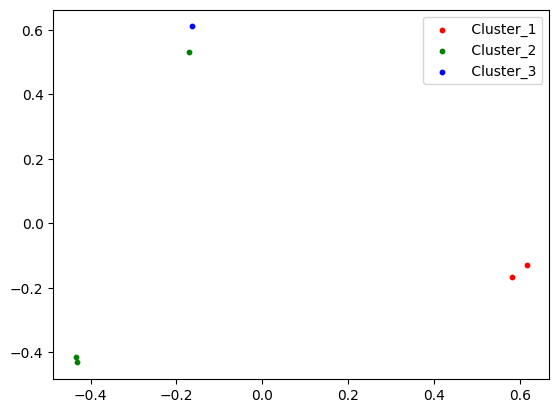

In [1]:
# import the necessary libraries 
import json 
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

# Extract the sentence only 
sentence = ["Gravity is one of the fundamental forces of nature, and it plays a crucial role in our understanding of the universe It is the force of attraction that exists between all objects with mass or energy. In simple terms, gravity is what keeps us anchored to the Earth and is responsible for the motion of celestial bodies like planets, stars, and galaxies.", "Gravity is a 2013 science fiction thriller film directed by Alfonso Cuarón. The film stars Sandra Bullock and George Clooney as astronauts who are stranded in space after their space shuttle is damaged. The movie explores their struggle for survival as they attempt to return to Earth.", "Gravity is a universal force, meaning it acts on all objects with mass or energy. It doesn't just apply to objects on Earth; it extends throughout the entire universe. This characteristic makes gravity unique compared to other forces like electromagnetism or the strong and weak nuclear forces, which have more limited ranges.", "Gravity received critical acclaim for its groundbreaking visual effects, particularly in its realistic depiction of outer space and zero-gravity environments. It won several Academy Awards, including Best Director for Alfonso Cuarón. The film is known for its tense and immersive storytelling and is considered a landmark in the science fiction genre.", "In 2018, twenty-three days after Thanos erased half of all life in the universe,[a] Carol Danvers rescues Tony Stark and Nebula from deep space and they reunite with the remaining Avengers—Bruce Banner, Steve Rogers, Thor, Natasha Romanoff, and James Rhodes—and Rocket on Earth. Locating Thanos on an uninhabited planet, they plan to use the Infinity Stones to reverse his actions, only to find that Thanos has already destroyed them and the Gauntlet, thus preventing any further use. Enraged, Thor decapitates Thanos.", "The Asgardian Loki encounters the Other, the leader of an extraterrestrial race known as the Chitauri. In exchange for retrieving the Tesseract,[c] a powerful energy source of unknown potential, the Other promises Loki an army with which he can subjugate Earth. Nick Fury, director of the espionage agency S.H.I.E.L.D., arrives at a remote research facility, where physicist Dr. Erik Selvig is leading a team experimenting on the Tesseract. The Tesseract suddenly activates and opens a wormhole, allowing Loki to reach Earth. Loki steals the Tesseract and uses his scepter to enslave Selvig and other agents, including Clint Barton, to aid him."]
# create vectorizer 
vectorizer = TfidfVectorizer(stop_words='english') 

# vectorizer the text documents 
vectorized_documents = vectorizer.fit_transform(sentence) 

# reduce the dimensionality of the data using PCA 
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(vectorized_documents.toarray()) 


# cluster the documents using k-means 
num_clusters = 3
kmeans = KMeans(n_clusters=3, n_init=5, 
				max_iter=500, random_state=42) 
kmeans.fit(vectorized_documents) 


# create a dataframe to store the results 
results = pd.DataFrame() 
results['document'] = sentence 
results['cluster'] = kmeans.labels_ 

# print the results 
file1 = open("Gravity_Clusters.txt", "w")
print(results.sample(len(results)))

# plot the results 
colors = ['red', 'green', 'blue'] 
cluster = ['Cluster_1','Cluster_2', 'Cluster_3'] 
for i in range(num_clusters): 
	plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
				reduced_data[kmeans.labels_ == i, 1], 
				s=10, color=colors[i], 
				label=f' {cluster[i]}') 
plt.legend() 
plt.show()

In [5]:
import nltk
nltk.download('stopwords', download_dir='C:/nltk_data')

[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [1]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string

# Download NLTK data (you can specify a different path if needed)
nltk.download('punkt', download_dir='path/to/nltk_data')
nltk.download('stopwords', download_dir='path/to/nltk_data')

# Sample documents
documents = [
    "Text processing with Python is great.",
    "Natural language processing is important for machine learning.",
    "Python is a versatile programming language.",
    "Topic modeling helps in discovering hidden topics in a collection of documents.",
    "Gensim is a popular library for topic modeling in Python.",
]

# Tokenize and preprocess the documents
stop_words = set(nltk.corpus.stopwords.words('english') + list(string.punctuation))
tokenized_documents = [' '.join(nltk.word_tokenize(doc.lower())) for doc in documents]
filtered_documents = [' '.join([word for word in doc.split() if word not in stop_words]) for doc in tokenized_documents]

# Create a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_documents)

# Build the LDA model
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_model.fit(X)

# Assign topics to each document
document_topics = lda_model.transform(X)

# Define topic labels based on top words in each topic
topic_labels = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-5-1:-1]  # Get the indices of the top 5 words
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    topic_labels.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Select the most relevant topics for each document
num_top_topics = 1  # Adjust the number of top topics you want to retrieve

for doc_idx, doc_topics in enumerate(document_topics):
    top_topic_indices = doc_topics.argsort()[:-num_top_topics-1:-1]
    top_topics = [(topic_idx, doc_topics[topic_idx]) for topic_idx in top_topic_indices]
    
    print(f"Document #{doc_idx + 1}:")
    print(documents[doc_idx])
    for topic, score in top_topics:
        print(f"  {topic_labels[topic]} (Score: {score:.4f})")

    # You can further process the top topics as needed
    print("\n")


Document #1:
Text processing with Python is great.
  Topic 1: modeling, topic, collection, topics, helps (Score: 0.8536)


Document #2:
Natural language processing is important for machine learning.
  Topic 2: python, language, processing, learning, natural (Score: 0.9208)


Document #3:
Python is a versatile programming language.
  Topic 2: python, language, processing, learning, natural (Score: 0.8920)


Document #4:
Topic modeling helps in discovering hidden topics in a collection of documents.
  Topic 1: modeling, topic, collection, topics, helps (Score: 0.9389)


Document #5:
Gensim is a popular library for topic modeling in Python.
  Topic 2: python, language, processing, learning, natural (Score: 0.9077)




[nltk_data] Downloading package punkt to path/to/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to path/to/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string

# Sample documents
documents = [
    "Text processing with Python is great.",
    "Natural language processing is important for machine learning.",
    "Python is a versatile programming language.",
    "Topic modeling helps in discovering hidden topics in a collection of documents.",
    "Gensim is a popular library for topic modeling in Python.",
]

# Tokenize and preprocess the documents
stop_words = set(nltk.corpus.stopwords.words('english') + list(string.punctuation))
tokenized_documents = [' '.join(nltk.word_tokenize(doc.lower())) for doc in documents]
filtered_documents = [' '.join([word for word in doc.split() if word not in stop_words]) for doc in tokenized_documents]

# Create a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_documents)

# Build the LDA model
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_model.fit(X)

# Assign topics to each document
document_topics = lda_model.transform(X)

# Group documents based on similar topics
grouped_documents = {}
for doc_idx, doc_topics in enumerate(document_topics):
    top_topic_index = doc_topics.argmax()
    
    if top_topic_index not in grouped_documents:
        grouped_documents[top_topic_index] = []
    
    grouped_documents[top_topic_index].append(doc_idx)

# Print the grouped documents
for topic, docs in grouped_documents.items():
    print(f"Topic {topic + 1} - Grouped Documents:")
    for doc_idx in docs:
        print(f"  Document #{doc_idx + 1}: {documents[doc_idx]}")
    print("\n")


Topic 1 - Grouped Documents:
  Document #1: Text processing with Python is great.
  Document #4: Topic modeling helps in discovering hidden topics in a collection of documents.


Topic 2 - Grouped Documents:
  Document #2: Natural language processing is important for machine learning.
  Document #3: Python is a versatile programming language.
  Document #5: Gensim is a popular library for topic modeling in Python.


